Load RNA-Seq of the first set of sequenced samples and look at the data.

In [1]:
import os
import sys
from pathlib import Path

import sklearn
import numpy as np
import pandas as pd

In [2]:
filepath = Path.cwd()
print(filepath)

/Users/apartin/Dropbox/work/synbio


In [3]:
df = pd.read_csv(filepath/'cols.tbl.csv')
print('df.shape', df.shape)

df.shape (4549, 11)


In [4]:
# Note that 926F, 926M became MG1655F, MG1655F.1
df = df[['patric_id', 'feature.gene_id', 'feature.product',
         '77F', '77M', '78F', '78M', '530F', '530M',
         'MG1655F', 'MG1655F.1']]
df[:2]

,patric_id,feature.gene_id,feature.product,77F,77M,78F,78M,530F,530M,MG1655F,MG1655F.1
0,fig|511145.12.peg.21,949128,Uncharacterized protein YaaY,0.0,7.36507,39.7243,16.1571,25.7253,43.2832,15.4865,0.0
1,fig|511145.12.peg.29,0,hypothetical protein,0.0,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0


In [5]:
# Drop low expression genes
idx = df.iloc[:,3:].sum(axis=1) < 1e-5
df = df.loc[~idx,:].reset_index(drop=True)
df[:2]

,patric_id,feature.gene_id,feature.product,77F,77M,78F,78M,530F,530M,MG1655F,MG1655F.1
0,fig|511145.12.peg.21,949128,Uncharacterized protein YaaY,0.0000,7.36507,39.72430,16.157100,25.725300,43.28320,15.48650,0.0
1,fig|511145.12.peg.46,944766,Putative metabolite transport protein YaaU,1.4637,1.73000,3.24929,0.936668,0.562224,3.58935,3.33065,0.0


In [6]:
df = df.drop(columns=['patric_id', 'feature.gene_id'])

In [7]:
df1 = df.set_index('feature.product').T
df1.columns.name = None
df1 = df1.reset_index().rename(columns={'index': 'sample'})

In [8]:
print(df1.iloc[:,1:].values.max())
print(df1.iloc[:,1:].values.min())

37736.3
0.0


In [9]:
# Log2 the values
df1 = np.log2( df1.iloc[:,1:] )

/Users/apartin/anaconda3/envs/cell-drug-sens/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  


In [10]:
print(df1.values.max())
print(df1.values.min())

15.203665354863704
-inf


In [11]:
df1 = df1.applymap(lambda x: 0 if x < 0 else x)

# PCA plots

In [12]:
sys.path.append('../pilot1/utils_py')
import utils_all

Using TensorFlow backend.


In [13]:
color_vector = np.array(['77','77', '78','78', '530','530', 'MG1655', 'MG1655'])

Explained variance by PCA components [1, 2]:  [0.37034, 0.20017]


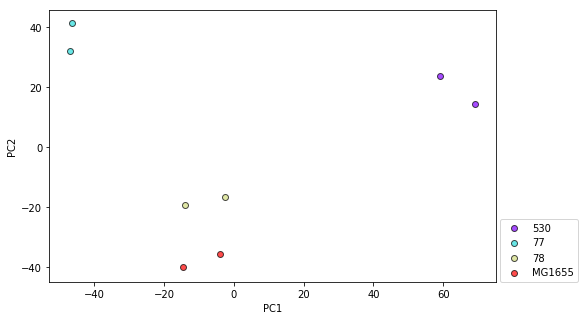

In [14]:
pca = utils_all.plot_pca(df1.iloc[:,1:], components=[1,2],
                         color_vector=color_vector, to_scale=True, verbose=True)

Explained variance by PCA components [1, 3]:  [0.37034, 0.16252]


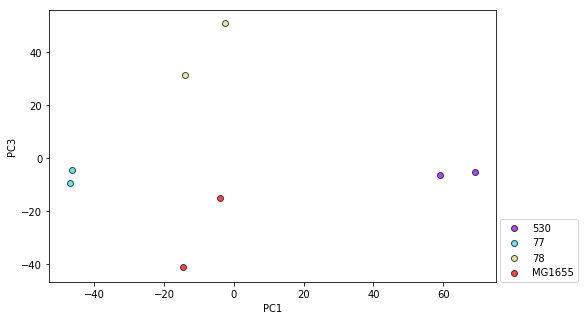

In [15]:
pca = utils_all.plot_pca(df1.iloc[:,1:], components=[1,3],
                         color_vector=color_vector, to_scale=True, verbose=True)

Explained variance by PCA components [2, 3]:  [0.20017, 0.16252]


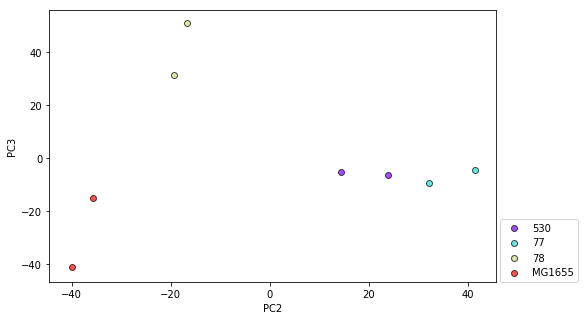

In [16]:
pca = utils_all.plot_pca(df1.iloc[:,1:], components=[2,3],
                         color_vector=color_vector, to_scale=True, verbose=True)

# Compare RNA-Seq values with other samples

In [17]:
lincs = utils_all.CombinedRNASeqLINCS(dataset='raw')


Dataset: combined_rnaseq_data_lincs1000
df_rna (15196, 943)
meta   (15196, 20)
GDC       11081
NCIPDM     1198
CCLE       1018
CTRP        812
GDSC        670
gCSI        357
NCI60        60
Name: Sample, dtype: int64


In [18]:
rna = lincs._df_rna
meta = lincs._meta

In [20]:
rna.head()

,Sample,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,...,ZMIZ1,ZMYM2,ZNF131,ZNF274,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10
0,CCLE.22RV1,8.31,7.17,4.12,5.64,6.04,3.94,2.08,5.24,5.23,...,3.22,4.85,4.46,3.98,4.77,1.58,3.90,4.19,3.88,5.37
1,CCLE.2313287,8.94,6.30,3.83,6.60,5.99,6.34,3.72,4.67,5.78,...,3.86,4.80,4.72,4.13,4.03,1.00,3.97,3.82,3.78,5.49
2,CCLE.253J,7.58,6.53,3.59,5.94,5.77,5.93,2.35,4.84,4.50,...,3.22,3.61,3.80,4.31,3.20,0.60,2.11,2.69,1.97,3.69
3,CCLE.253JBV,7.79,6.01,4.05,6.44,5.97,5.58,2.89,5.09,4.39,...,3.74,3.81,3.99,4.21,3.93,0.98,2.24,2.47,2.60,4.14
4,CCLE.42MGBA,7.84,6.72,3.09,6.92,5.43,5.38,3.99,5.85,5.17,...,5.48,3.04,4.95,4.79,3.52,1.24,3.08,2.44,2.10,5.65


In [21]:
print(rna.iloc[:,1:].values.max())
print(rna.iloc[:,1:].values.min())

16.96
0.0
